<a href="https://colab.research.google.com/github/azkbrqlna/2025-AI-Praktikum/blob/main/Jobsheet1_FaceDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Latihan 1 - Deteksi Wajah

Image converted to grayscale successfully.


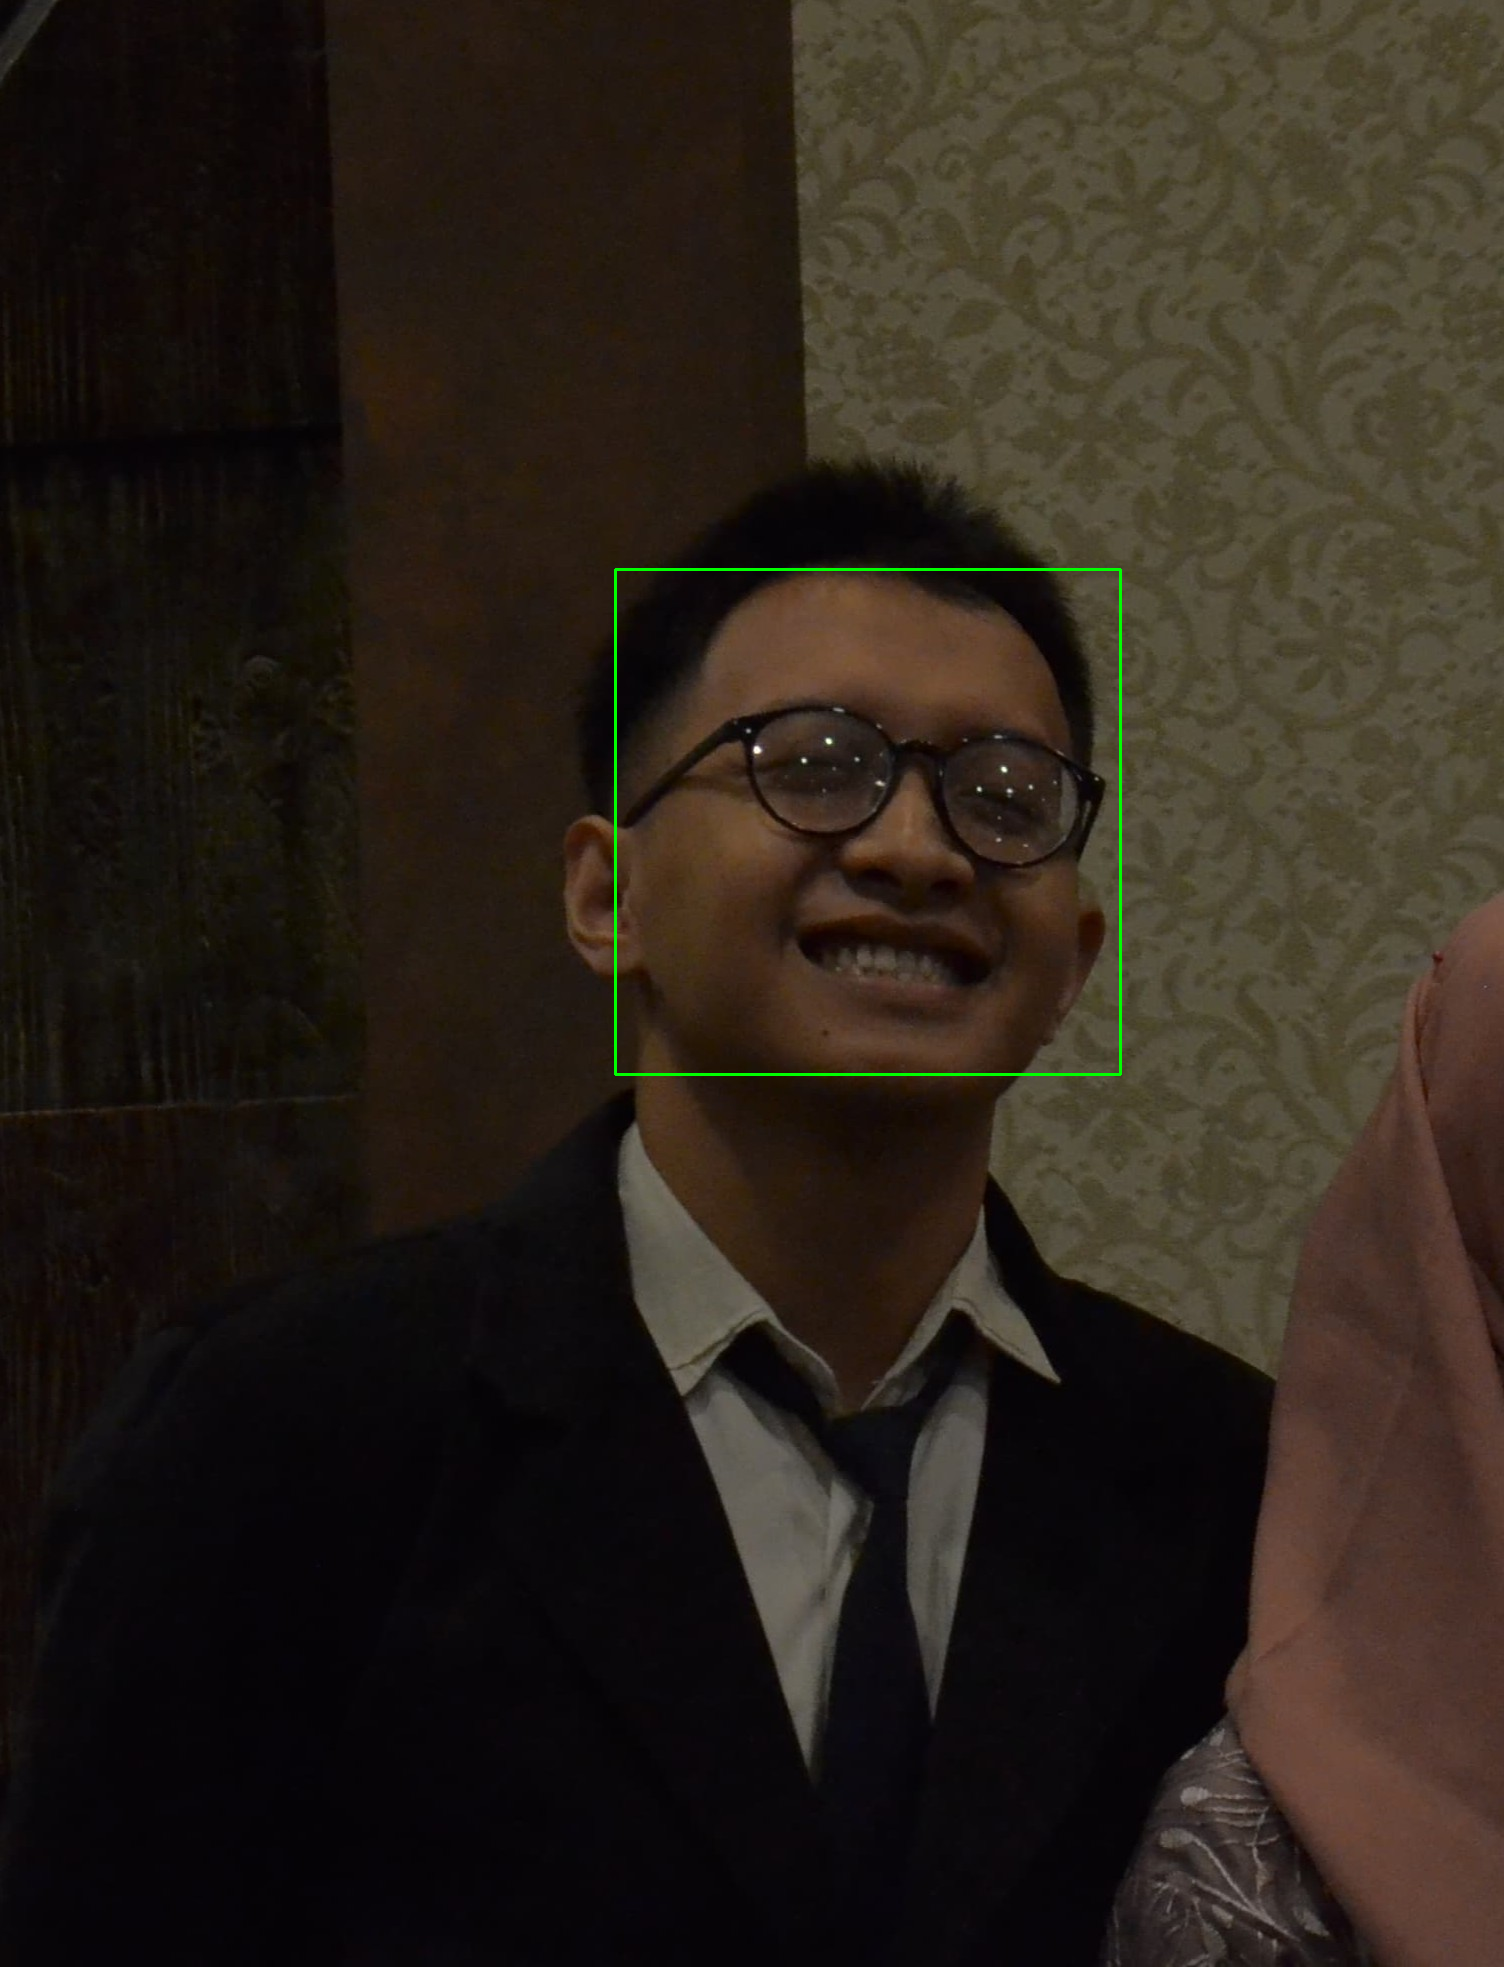

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread('/content/images/AzkaBariqlana.jpg')


if img is None:
  print("Error: Image not loaded. Please check the file path.")
else:
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  print("Image converted to grayscale successfully.")

haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
faces_rect = haar_cascade.detectMultiScale(gray, 1.1, 9)
for (x, y, w, h) in faces_rect:
  cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Latihan 2 - Deteksi Senyum

--2025-03-14 03:45:31--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.3’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.06s   

2025-03-14 03:45:31 (15.6 MB/s) - ‘haarcascade_frontalface_default.xml.3’ saved [930127/930127]

--2025-03-14 03:45:31--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_smile.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:44

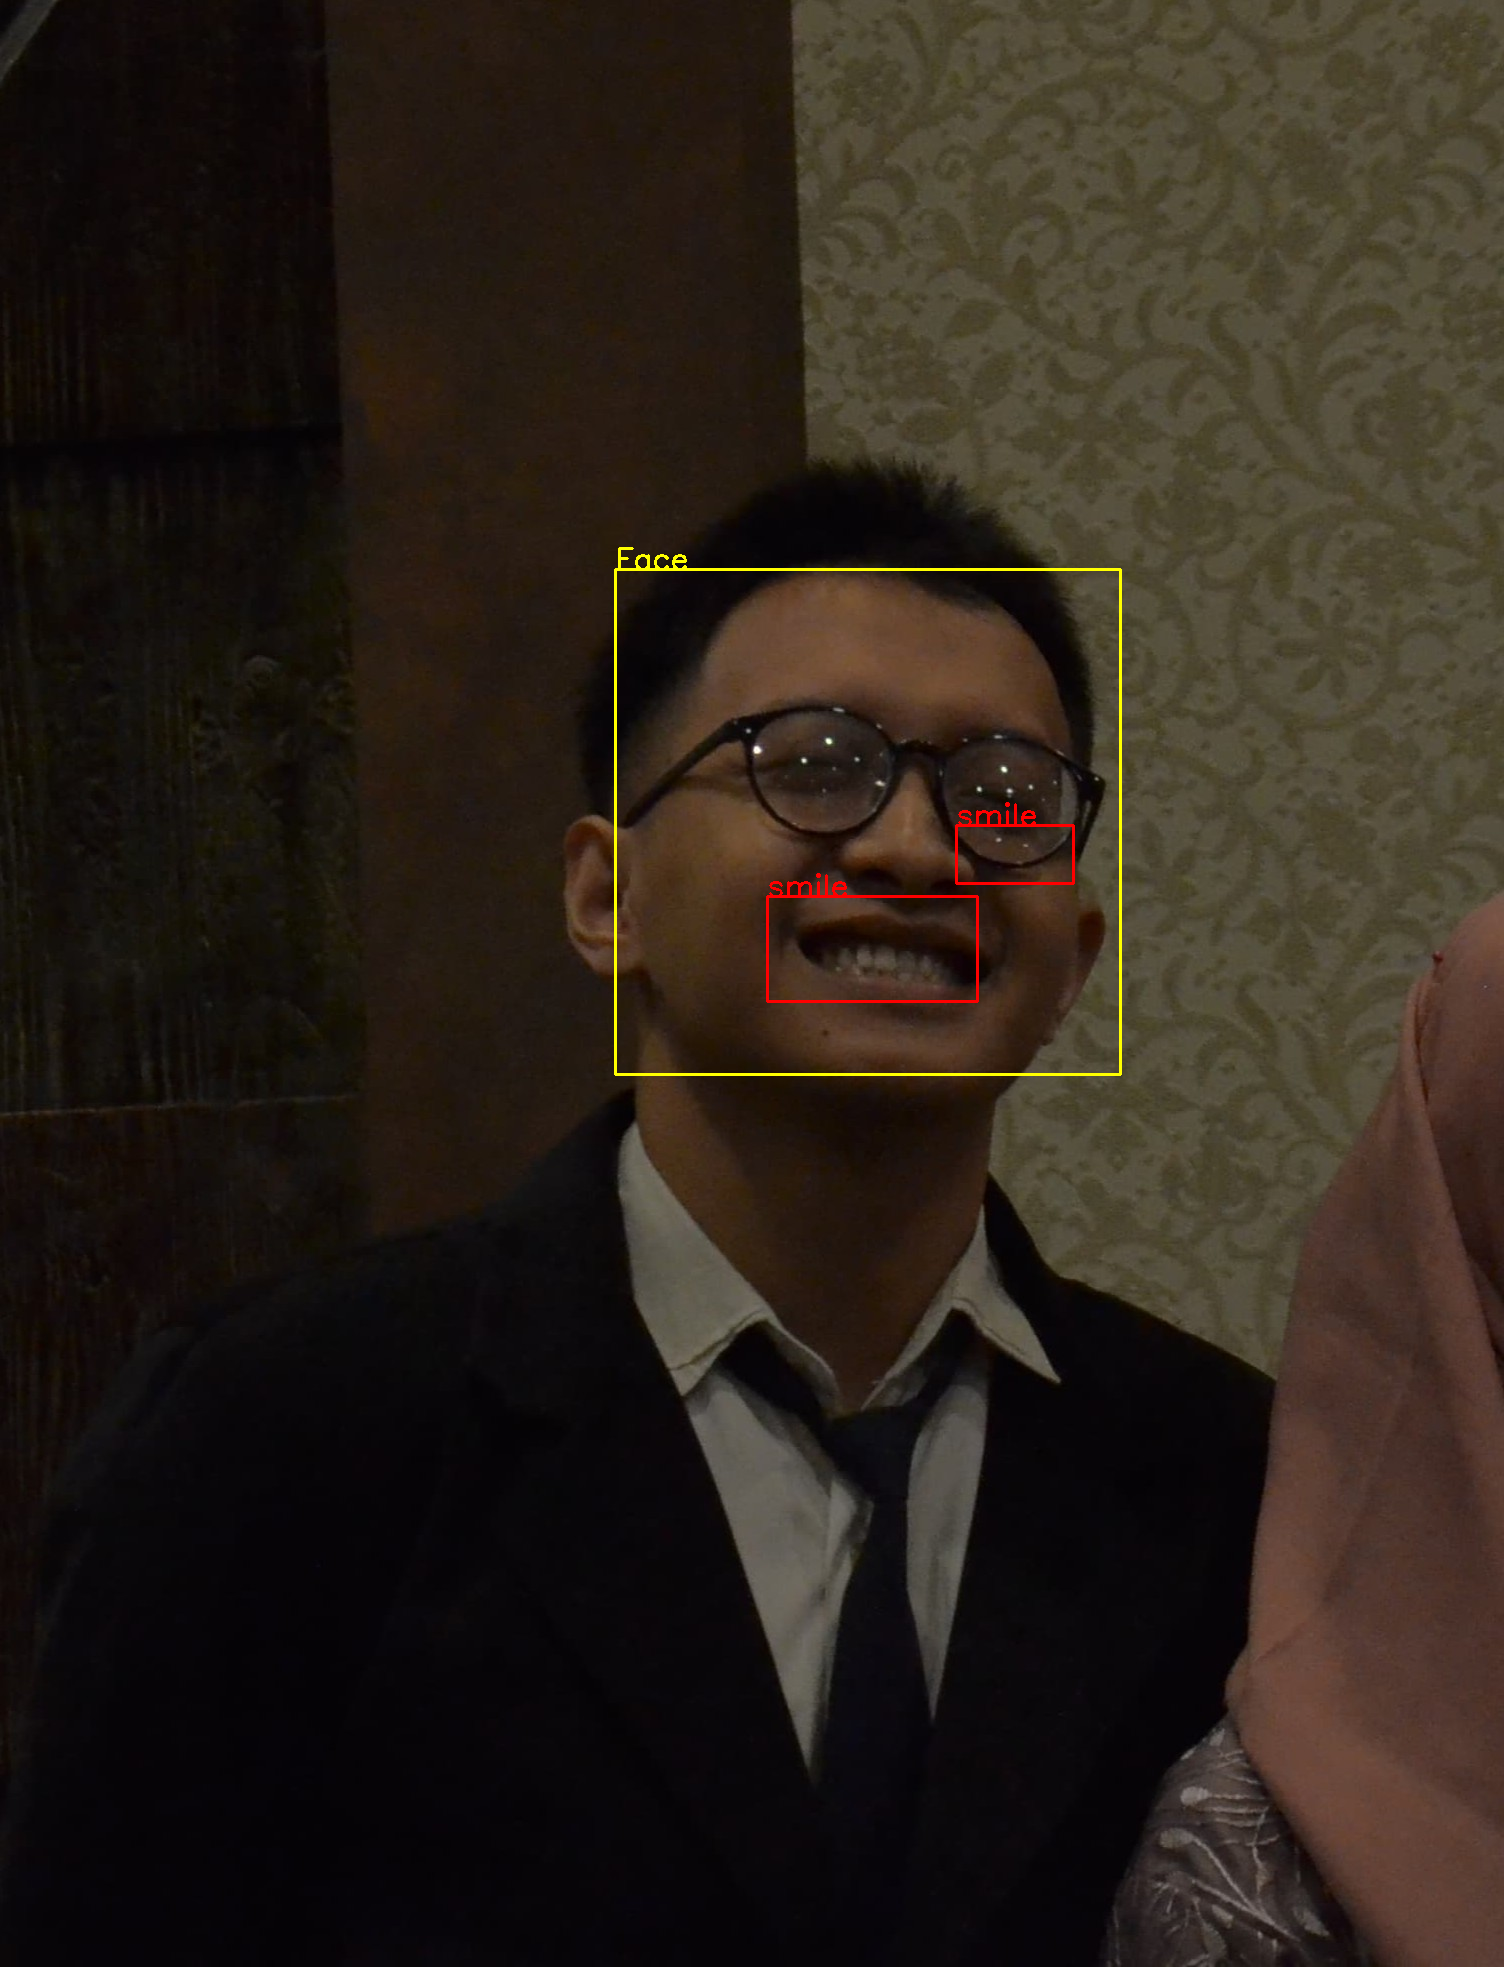

In [50]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_smile.xml
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread('/content/images/AzkaBariqlana.jpg')
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Update the paths to the downloaded XML files
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')

# Use gray_img instead of gray
faces = face_cascade.detectMultiScale(gray_img, 1.1, 9)
print('Number of detected faces:', len(faces))

for (x,y,w,h) in faces:
   cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
   cv2.putText(img, "Face", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)
   roi_gray = gray_img[y:y+h, x:x+w] # Use gray_img for consistency
   roi_color = img[y:y+h, x:x+w]

   smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)
   if len(smiles) > 0:
      print("smile detected")
      for (sx, sy, sw, sh) in smiles:
         cv2.rectangle(roi_color, (sx, sy), ((sx + sw), (sy + sh)), (0, 0, 255), 2)
         cv2.putText(roi_color, "smile", (sx, sy),
         cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
   else:
      print("smile not detected")

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()